In [1]:
import pandas as pd
import keras as K
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model,Model
from keras import models,layers
import tensorflow as tf

Using TensorFlow backend.
d:\other_all\application\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\other_all\application\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\other_all\application\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\other_all\application\python\lib\site-packages\tensorflo

In [2]:
from matplotlib import pyplot as plt 
from PIL import Image
import os
%matplotlib inline 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [18]:
import numpy as np 
import os 

feature_root = 'data_for_svm'
x_train = np.load(os.path.join(feature_root, 'x_train.npy'))
y_train = np.load(os.path.join(feature_root, 'y_train.npy'))
x_val = np.load(os.path.join(feature_root, 'x_val.npy'))
y_val = np.load(os.path.join(feature_root, 'y_val.npy'))

In [19]:
def rf(data = None,n_estimators = 50,train_size = 0.6,random_state = 1,max_depth=None,sts = False,have_data = False,x_train = None,x_test = None,y_train = None,y_test = None):
    '''随机森林
    n_estimators:基分类器的个数
    train)
    sts:标准化处理,默认False
    ret-->    projection_result,score'''
    if have_data == False:
        target = data['target']
        data_ = data.drop(['target'],axis = 1)
        if sts == True:
            data_ = StandardScaler().fit_transform(data_)
        x_train,x_test,y_train,y_test = train_test_split(data_, target, random_state=random_state, train_size=train_size,stratify=target)
    print(np.unique(y_train).size,np.unique(y_test).size)
    RF = RandomForestClassifier(n_estimators = n_estimators,max_depth=max_depth)
    clf = RF.fit(x_train,y_train)
    score_train = RF.score(x_train,y_train)
    score_test = RF.score(x_test,y_test)
    return [clf,score_train,score_test]

# 特征选择

In [20]:
from sklearn.feature_selection import SelectFromModel
import time 

time_begin = time.time()
RF = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 45)
RF.fit(x_train,y_train)
a = RF.feature_importances_.max()
b = RF.feature_importances_.min()
time_end = time.time()
print('随机森林训练时间：{}分钟'.format((time_end-time_begin)/60))

随机森林训练时间：2.664390997091929分钟


In [21]:
print(a,b)

0.003474948857504783 0.00012965231092933836


In [ ]:
s_tr = []
s_te = []
feature_nums_rf = []
for threshold in np.linspace(b,a,100):
    select_model = SelectFromModel(RF,threshold = threshold,prefit=True)
    x_train_selected = select_model.transform(x_train)
    x_val_selected = select_model.transform(x_val)
    if x_val_selected.shape[1] in feature_nums_rf:
        continue
    data_model,score_train,score_test = rf(random_state = 42,max_depth = 45, have_data = True, x_train = x_train_selected,
                                          y_train = y_train, x_test = x_val_selected, y_test = y_val )
    s_tr.append(score_train)
    s_te.append(score_test)
    feature_nums_rf.append(x_val_selected.shape[1])
    print('threshold =',threshold)
    print('特征数量为：',len(x_var.columns)-1)
    print('训练集准确率:%f'%score_train)
    print('测试集准确率:%f'%score_test)
    print('-'*100)

In [ ]:
from matplotlib import pyplot as plt
x = np.linspace(b,a,100)[:84]
plt.plot(x,s_tr,'r--',label = 'score_train')
plt.plot(x,s_te,'b',label = 'score_test')
plt.title('RF_score')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.savefig('rf_select_feature.png', dpi = 200)
plt.show()

# SVM版本


In [7]:
def Svm(data = None,kernel='linear',degree = 1,sts = False,random_state=1,train_size=0.6,max_iter = -1,have_data = False,x_train = None,x_test = None,y_train = None,y_test = None):
    '''支持向量机
    kernel:核
    ret-->    projection_result,score'''
    if have_data == False:
        target = data['target']
        data_ = data.drop(['target'],axis = 1)
        if sts == True:
            data_ = StandardScaler().fit_transform(data_)
        x_train,x_test,y_train,y_test = train_test_split(data_, target, random_state=random_state, train_size=train_size,stratify=target)
    print(np.unique(y_train).size,np.unique(y_test).size)
    clf = SVC( kernel=kernel, gamma='auto',degree = degree,max_iter = max_iter).fit(x_train,y_train)
    score_train = clf.score(x_train,y_train)
    score_test = clf.score(x_test,y_test)
    return [clf,score_train,score_test]

In [8]:
s_tr_ = []
s_te_ = []
for threshold in np.linspace(b,a,100):
    time_begin = time.time()
    select_model = SelectFromModel(RF,threshold = threshold,prefit = True)
    x_train_selected = select_model.transform(x_train)
    x_val_selected = select_model.transform(x_val)
    time_transform = time.time()
    print('数据转换时间消耗:{}分钟'.format((time_transform-time_begin)/60))
    try:
        data_model,score_train,score_test = Svm(random_state=42, x_train = x_train_selected, have_data = True,
                                                y_train = y_train ,x_test = x_val_selected, y_test = y_val)
    except:
        break
    time_end = time.time()
    s_tr_.append(score_train)
    s_te_.append(score_test)
    print('threshold =',threshold)
    print('特征数量为：',x_train_selected.shape)
    print('训练集准确率:%f'%score_train)
    print('测试集准确率:%f'%score_test)
    print('时间消耗:%f'%((time_end-time_begin)/60))
    print('-'*100)

数据转换时间消耗:0.007928828398386637分钟
104 104
threshold = 0.00012965231092933836
特征数量为： (13172, 2048)
训练集准确率:1.000000
测试集准确率:0.890981
时间消耗:9.763677
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.008012410004933674分钟
104 104
threshold = 0.00016344318513717115
特征数量为： (13172, 2023)
训练集准确率:1.000000
测试集准确率:0.891285
时间消耗:8.991538
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.007629569371541341分钟
104 104
threshold = 0.00019723405934500392
特征数量为： (13172, 1938)
训练集准确率:1.000000
测试集准确率:0.889766
时间消耗:8.200370
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.007130968570709229分钟
104 104
threshold = 0.00023102493355283668
特征数量为： (13172, 1819)
训练集准确率:1.000000
测试集准确率:0.889766
时间消耗:7.630744
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.00654916365941365

threshold = 0.0012785420339956528
特征数量为： (13172, 61)
训练集准确率:0.972442
测试集准确率:0.752202
时间消耗:0.449631
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0008976141611735026分钟
104 104
threshold = 0.0013123329082034855
特征数量为： (13172, 56)
训练集准确率:0.961282
测试集准确率:0.730944
时间消耗:0.440306
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0008976141611735026分钟
104 104
threshold = 0.0013461237824113183
特征数量为： (13172, 47)
训练集准确率:0.921804
测试集准确率:0.711509
时间消耗:0.424631
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0009142200152079265分钟
104 104
threshold = 0.001379914656619151
特征数量为： (13172, 45)
训练集准确率:0.917552
测试集准确率:0.711509
时间消耗:0.429651
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0008478323618570963分钟
104 104
threshold = 0.0014137055308269838
特征数

threshold = 0.0024612226312698
特征数量为： (13172, 6)
训练集准确率:0.326222
测试集准确率:0.309141
时间消耗:0.504384
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0007646361986796061分钟
104 104
threshold = 0.0024950135054776328
特征数量为： (13172, 6)
训练集准确率:0.326222
测试集准确率:0.309141
时间消耗:0.497503
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0007313807805379231分钟
104 104
threshold = 0.0025288043796854657
特征数量为： (13172, 5)
训练集准确率:0.295096
测试集准确率:0.280292
时间消耗:0.519511
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.0007647116978963216分钟
104 104
threshold = 0.0025625952538932983
特征数量为： (13172, 4)
训练集准确率:0.232387
测试集准确率:0.218646
时间消耗:0.527356
----------------------------------------------------------------------------------------------------
数据转换时间消耗:0.004720600446065267分钟
104 104
threshold = 0.0025963861281011313
特征数量为： (13

In [ ]:
if 's_tr_' in vars() and s_tr_!=[]:
    pass 
else:
#     s_tr_ = np.load('data_for_svm/s_tr_svm.npy',allow_pickle=True)
#     s_te_ = np.load('data_for_svm/s_te_svm.npy',allow_pickle=True)
    df_svm = pd.read_csv('data_for_svm/history_svm.csv')
    s_tr_ = np.array(df_svm['train_acc'])
    s_te_ = np.array(df_svm['test_acc'])
    feature_nums = np.array(df_svm['nums'])

https://www.jianshu.com/p/0463da5e0c46 坐标轴科学计数法

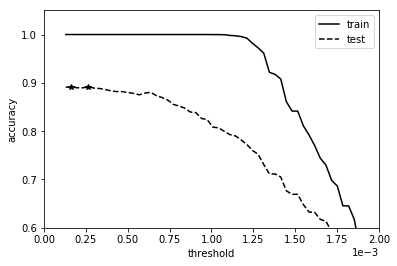

In [32]:
from matplotlib import pyplot as plt
x = np.linspace(b,a,100)#[:84]
plt.plot(x,s_tr_,'k',label = 'train')
plt.plot(x,s_te_,'k--',label = 'test')
plt.plot(x[np.array(s_te_)>np.array(s_te_)[0]],np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
# plt.title('SVM')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
plt.legend()
plt.ylim(0.6,1.05)
plt.xlim(0,0.002)
plt.savefig('svm_select_feature.png',dpi = 200)
plt.show()

# 绘制SVM+特征提取 数量关系图

In [12]:
feature_nums = []
for threshold in np.linspace(b,a,100):
    select_model = SelectFromModel(RF,threshold = threshold,prefit = True)
    x_val_selected = select_model.transform(x_val)
    feature_nums.append(x_val_selected.shape[1])

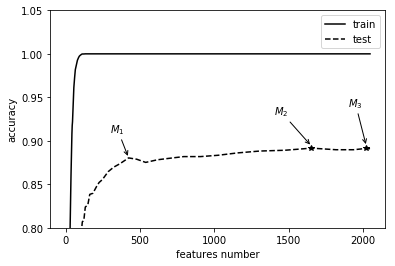

In [16]:
from matplotlib import pyplot as plt
plt.plot(feature_nums,s_tr_,'k',label = 'train')
plt.plot(feature_nums,s_te_,'k--',label = 'test')
plt.plot(np.array(feature_nums)[np.array(s_te_)>np.array(s_te_)[0]],np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
plt.ylim(0.8,1.05)
# plt.title('SVM')
plt.xlabel('features number')
plt.ylabel('accuracy')
plt.annotate(s = '$M_1$',xy = (424, 0.8805), xytext=(300,0.91),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_2$',xy = (1654, 0.894), xytext=(1400,0.93),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_3$',xy = (2023, 0.894), xytext=(1900,0.94),arrowprops={'arrowstyle':'->'})
plt.legend()
plt.savefig('svm_select_feature_nums.png',dpi = 200)
plt.show()

# feature importances绘制

<function matplotlib.pyplot.show(*args, **kw)>

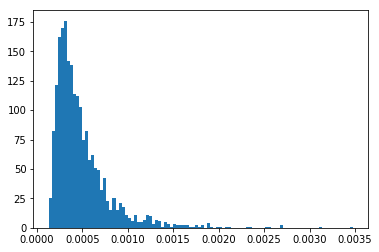

In [38]:
plt.hist(RF.feature_importances_,100)
plt.show

# 合并绘图

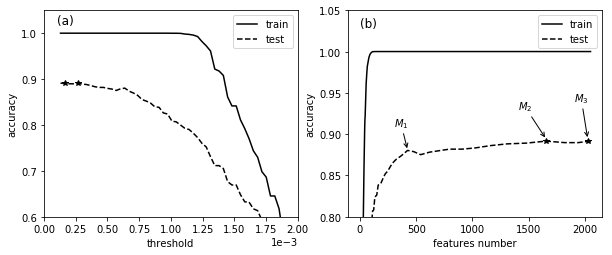

In [60]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,3.8))
plt.subplot(121)
x = np.linspace(b,a,100)#[:84]
plt.plot(x,s_tr_,'k',label = 'train')
plt.plot(x,s_te_,'k--',label = 'test')
plt.plot(x[np.array(s_te_)>np.array(s_te_)[0]],np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
# plt.title('SVM')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
plt.legend()
plt.ylim(0.6,1.05)
plt.xlim(0,0.002)
plt.text(0.1*1e-3,1.02,'(a)',fontsize=12)

plt.subplot(122)
plt.plot(feature_nums,s_tr_,'k',label = 'train')
plt.plot(feature_nums,s_te_,'k--',label = 'test')
plt.plot(np.array(feature_nums)[np.array(s_te_)>np.array(s_te_)[0]],np.array(s_te_)[np.array(s_te_)>np.array(s_te_)[0]],'k*')
plt.ylim(0.8,1.05)
# plt.title('SVM')
plt.xlabel('features number')
plt.ylabel('accuracy')
plt.annotate(s = '$M_1$',xy = (424, 0.8805), xytext=(300,0.91),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_2$',xy = (1654, 0.894), xytext=(1400,0.93),arrowprops={'arrowstyle':'->'})
plt.annotate(s = '$M_3$',xy = (2023, 0.894), xytext=(1900,0.94),arrowprops={'arrowstyle':'->'})
plt.legend()
plt.text(0.1,1.03,'(b)',fontsize=12)
plt.savefig('svm_select_merge.png',dpi = 200)
plt.show()

In [31]:
if not os.path.exists('data_for_svm/history_svm.csv'):
    df_svm = pd.DataFrame()
    df_svm['nums'] = feature_nums
    df_svm['train_acc'] = s_tr_
    df_svm['test_acc'] = s_te_
    df_svm.to_csv('data_for_svm/history_svm.csv',index = None)

In [34]:
import joblib 

joblib.dump(RF,'data_for_svm/RF.model')

['data_for_svm/RF.model']

In [16]:
np.save('data_for_svm/s_tr_svm',s_tr_)
np.save('data_for_svm/s_te_svm',s_te_)
# help(select_model)

Help on SelectFromModel in module sklearn.feature_selection.from_model object:

class SelectFromModel(sklearn.base.BaseEstimator, sklearn.feature_selection.base.SelectorMixin, sklearn.base.MetaEstimatorMixin)
 |  Meta-transformer for selecting features based on importance weights.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimator : object
 |      The base estimator from which the transformer is built.
 |      This can be both a fitted (if ``prefit`` is set to True)
 |      or a non-fitted estimator. The estimator must have either a
 |      ``feature_importances_`` or ``coef_`` attribute after fitting.
 |  
 |  threshold : string, float, optional default None
 |      The threshold value to use for feature selection. Features whose
 |      importance is greater or equal are kept while the others are
 |      discarded. If "median" (resp. "mean"), then the ``threshold`` value is
 |      the median (resp. the mean) of the feature importances. A scaling
 |     

In [12]:
from sklearn.feature_selection import VarianceThreshold
number = np.median(data.iloc[:,:-1].var().values)
selector = VarianceThreshold(number)

In [13]:
x_var = selector.fit_transform(data.iloc[:,:-1])

In [14]:
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]

In [47]:
data_model,score_train,score_test = Svm(data = data,random_state = 42,train_size = 0.6)

104 104


In [48]:
print(score_train)
print('--------------')
print(score_test)

1.0
--------------
0.9629773014385264


In [ ]:
data_model_,score_train_,score_test_ = rf(data = data,random_state = 42,train_size = 0.6)

In [49]:
nums = range(50,550,50)
scores_train = []
scores_test = []
for i in nums:
    data_model,score_train,score_test = rf(data = data,random_state = 42,train_size = 0.8,n_estimators = i)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104


MemoryError: could not allocate 54525952 bytes

In [ ]:
nums = range(50,550,50)
from matplotlib import pyplot as plt
plt.plot(nums,scores_train)
plt.plot(nums,scores_test)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [35]:
max(scores_test)

0.8298653610771114

In [23]:
import joblib
joblib.dump(data_model,'data_model')

['data_model']

In [13]:
num_var = np.linspace(number-0.2,number+0.2,20)     #以数据方差中位数为中心，邻域0.2，生成20个数

In [14]:
# data = get_train_imgs(filePath,img_size = 150)

In [14]:
scores_train = []
scores_test = []
for i in num_var:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = Svm(data = x_var,random_state = 42,train_size = 0.8)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104


MemoryError: Unable to allocate 791. MiB for an array with shape (50629, 2048) and data type float64

In [13]:
import joblib
joblib.dump(scores_train,'scores_train')
joblib.dump(scores_test,'scores_test')

['scores_test']

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#画学习曲线
plt.plot(num_var,scores_train,'r')
plt.plot(num_var,scores_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [16]:
num_var_new = np.linspace(0.5,0.7,20)

In [17]:
for i in num_var_new:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = rf(data = x_var,random_state = 0)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


In [18]:
num_var_ = np.append(num_var,num_var_new)

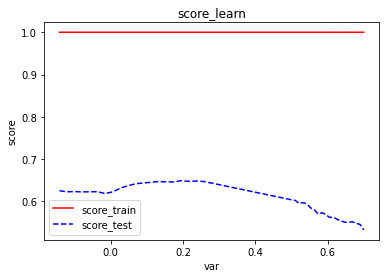

In [19]:
plt.plot(num_var_,scores_train,'r')
plt.plot(num_var_,scores_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [20]:
max_var = num_var_[np.where(np.array(scores_test)==max(scores_test))[0]]

In [21]:
max_var

array([0.19516029])

In [22]:
num_vars = np.where(np.array(data.iloc[:,:-1].var())<=max_var)[0]

In [23]:
max(scores_test)

0.6487208116898878

In [24]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
scores_train_new = []
scores_test_new = []
for i in range(21,71):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


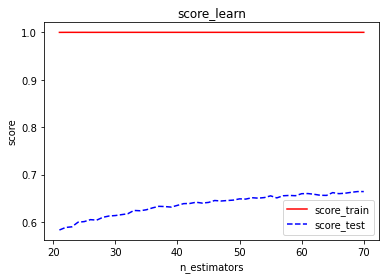

In [25]:
plt.plot(range(21,71),scores_train_new,'r')
plt.plot(range(21,71),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [26]:
n_location = np.where(np.array(scores_test_new)==max(scores_test_new))[0][0]
b = range(20,71)
n_es = b[n_location]
print(n_es)

68


In [27]:
a = np.linspace(max_var-0.02,max_var+0.02,40)
s_train = []
s_test = []
for i in a:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = rf(data = x_var,random_state = 0)
    s_train.append(score_train)
    s_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


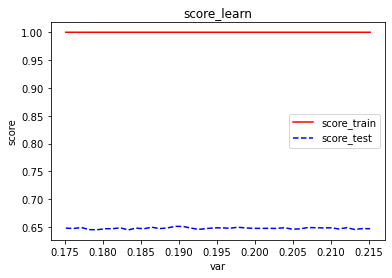

In [28]:
plt.plot(a,s_train,'r')
plt.plot(a,s_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [30]:
n_location = np.where(np.array(scores_test_new)==max(scores_test_new))[0][0]
b = range(20,71)
n_es = b[n_location]
print(n_es)

68


In [31]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
scores_train_new = []
scores_test_new = []
for i in range(20,51):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = n_es,max_depth = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


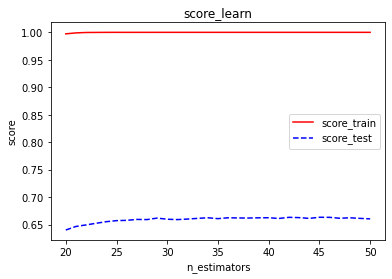

In [34]:
plt.plot(range(20,51),scores_train_new,'r')
plt.plot(range(20,51),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [43]:
location = np.where(np.array(scores_test_new)==max(scores_test_new))[0]
c = range(20,51)
max_depth_ = c[location[0]]
print(max_depth_)

45


In [45]:
max(scores_test_new)

0.6634302636050293

In [46]:
for i in range(51,101):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = n_es,max_depth = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


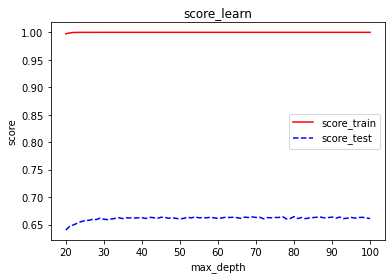

In [50]:
plt.plot(range(20,101),scores_train_new,'r')
plt.plot(range(20,101),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [49]:
max(scores_test_new)

0.6647045973105491

In [55]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [53]:
x_ = x_var.iloc[:,:-1]
y_ = x_var.iloc[:,-1]

In [58]:
x_fschi = SelectKBest(chi2,k=300).fit_transform(x_,y_)
x_var_ = DataFrame(x_fschi)
x_var_['target'] = y_

In [61]:
data_model,score_train,score_test = rf(data = x_var_)

104 104


In [63]:
print(score_train)
print('-----------')
print(score_test)

1.0
-----------
0.6466818777610563


In [107]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = 63)

104 104


In [108]:
print(score_train)
print('-------------')
print(score_test)

1.0
-------------
0.5638680894361972


In [100]:
number_var = data.iloc[:,:-1].var().values
location = np.where(number_var <= max_var)[0]

In [104]:
data.drop(data.columns[location],axis = 1,inplace = True)

In [105]:
data

,50,68,82,115,140,184,186,204,249,334,...,1769,1805,1818,1838,1856,1952,1971,2008,2035,target
0,2.029764,0.107510,0.841237,1.413267,0.894694,1.807688,2.706053,0.561049,1.687882,0.523860,...,0.081868,0.020028,1.730571,0.946327,1.573209,0.692970,0.869795,1.447323,1.949489,0
1,1.563928,0.059336,0.252898,0.811333,0.451519,2.019778,2.572253,0.644330,1.284076,1.066929,...,0.078352,0.000000,1.253508,0.965499,2.588631,0.612374,0.922068,0.936405,0.511379,0
2,2.658684,0.008802,0.408691,1.277629,1.899195,1.126961,3.074686,0.005124,1.425292,0.432891,...,0.000000,0.000000,0.427821,0.744231,2.422109,0.192786,0.854320,1.700966,1.929059,0
3,1.367423,0.249107,2.731459,0.325498,2.844054,2.013674,4.263965,0.043518,0.908804,0.982026,...,0.245944,0.278697,0.544115,0.863820,1.476943,0.716402,2.454421,0.094801,0.754309,0
4,1.625419,0.074459,0.816589,0.276554,1.287139,1.903443,4.337196,0.383728,0.919022,0.195503,...,1.127508,0.436814,1.078216,0.591805,2.236411,0.397102,2.577402,0.637636,1.385357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191640,1.311690,0.068179,1.426739,0.206891,0.325206,0.233443,6.359915,0.000000,0.454559,0.170908,...,3.054931,0.134161,1.729751,0.258318,3.668587,1.821962,4.869658,0.745100,1.702854,103
191641,1.236122,0.035117,1.903564,0.013038,0.213146,0.117778,7.224601,0.000000,0.284747,0.543595,...,2.505177,0.078201,1.929453,0.000000,2.356084,1.867183,5.193253,0.201371,2.932915,103
191642,0.561354,0.108199,0.135889,0.133616,0.298224,0.165982,5.142556,0.127475,0.256536,0.243632,...,1.948220,0.012779,0.671461,0.091915,3.255402,1.023160,2.917643,0.348858,0.457295,103
191643,0.786001,0.041434,1.805209,0.091380,0.000000,0.223799,6.783127,0.405730,0.767736,0.067630,...,1.111833,0.000000,3.357048,0.000000,1.500085,1.065821,3.967472,0.164558,3.777227,103


# DataFrame一次性删除多列

In [80]:
a = DataFrame(np.arange(12).reshape(3,4))

a.columns = ['a','b','c','d']

x = [1,2]

a.drop(a.columns[x],axis = 1,inplace = True)